In [1]:
import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline
import socket
from threading import *
import sys
import time
import pylab as pl
from IPython import display

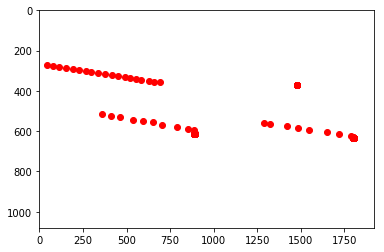

NameError: name 'plt' is not defined

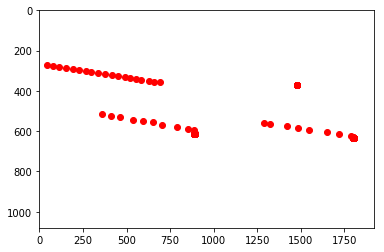

In [3]:
#plt.ion()
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_address = ('localhost', 9999)
sock.bind(server_address)
sock.listen(1)
# Wait for a connection
print (sys.stderr, 'waiting for a connection')
connection, client_address = sock.accept()
try:
        print (sys.stderr, 'connection from', client_address)

        # Receive the data in small chunks and retransmit it
        i=0
        while True:
            data = connection.recv(4096)
            point=data.decode('utf-8')
            points=point.split()
            try:
                x=(int(points[0])+int(points[2]))/2
                y=(int(points[1])+int(points[3]))/2
                #plt.scatter(x,y)
                #plt.pause(0.00001)
                #plt.axis([0,1920,1080,0])
                pl.plot(x,y,'ro')
                if i==5:
                    display.clear_output(wait=True)
                    display.display(pl.gcf())
                    i=0
                pl.axis([0,1920,1080,0])
                i=i+1
            except IndexError:
                plt.show()
                #plt.axis([0,1920,0,1080])
                pass
            #print ('received "%s"' % data.decode('utf-8'))
            
finally:
        # Clean up the connection
        connection.close()